In [1]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')

!pip3 install numpy 
!pip3 install pandas
!pip3 install matplotlib
!pip3 install keras
!pip3 install sklearn
!pip3 install tensorflow
!pip3 install coremltools

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
from __future__ import print_function
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
import coremltools
# coremltools supports Keras version 2.0.6
print('keras version ', keras.__version__)

keras version  2.3.1


In [4]:
# loading mnist dataset

(x_train, y_train), (x_val, y_val) = mnist.load_data()




X_train shape:  (60000, 28, 28)
60000  training samples
X_val shape:  (10000, 28, 28)
10000  validation samples
First x sample
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253

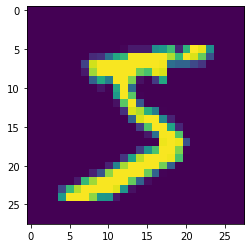

y_train shape:  (60000,)
First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]


In [6]:
# Inspect x data
print('X_train shape: ', x_train.shape)

print(x_train.shape[0], ' training samples')

print('X_val shape: ',x_val.shape)

print(x_val.shape[0], ' validation samples')


print('First x sample\n', x_train[0])

# Plot first x sample
plt.imshow(x_train[0])
plt.show()

# Inspect y data
print('y_train shape: ', y_train.shape)

print('First 10 y_train elements:', y_train[:10])

# 60,000 images , each containing an array of 28 arrays ( having 28 elements each )

In [7]:
# setting input output shapes
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
num_classes = 10 # digits from 0-9
print(img_rows,img_cols)

28 28


In [8]:
'''    *** reshaping ***
a full-color image with all 3 RGB channels will have a depth of 3.
Our MNIST images only have a depth of 1, but we must explicitly declare that.
In other words, we want to transform our dataset from having shape (n, width, height) to (n, width, height, depth)'''

# Set input_shape for channels_first or channels_last
if K.image_data_format() == 'channels_first':  
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:  
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [9]:
print('x_train shape:', x_train.shape)
# x_train shape: (60000, 28, 28, 1)
print('x_val shape:', x_val.shape)
# x_val shape: (10000, 28, 28, 1)
print('input_shape:', input_shape)
# input_shape: (28, 28, 1)


x_train shape: (60000, 28, 28, 1)
x_val shape: (10000, 28, 28, 1)
input_shape: (28, 28, 1)


In [10]:
# normalize 
# converting from data type of uint8 to float32
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

# normalizes into 28 arrays , each containing 28 arrays, each with one value between 0 and 1


In [11]:
# training data preprocessing 
print('y_train shape: ', y_train.shape)

# Convert 1-dimensional class arrays to 10-dimensional class matrices (one hot encoding)
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
print('New y_train shape: ', y_train.shape)



y_train shape:  (60000,)
New y_train shape:  (60000, 10)


In [12]:
# defining model 

model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.5))
model_m.add(Conv2D(64, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Conv2D(128, (1, 1), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(num_classes, activation='softmax'))
# Inspect model's layers, output shapes, number of trainable parameters
print(model_m.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)        

In [14]:
# training model

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
batch_size = 200
epochs = 10

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
hist=model_m.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs,
    callbacks=callbacks_list, validation_data=(x_val, y_val), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.0292 - val_accuracy: 0.9906
Epoch 2/10
60000/60000 [==============================] - 55s 915us/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0280 - val_accuracy: 0.9913
Epoch 3/10
60000/60000 [==============================] - 54s 898us/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0251 - val_accuracy: 0.9925
Epoch 4/10
60000/60000 [==============================] - 54s 904us/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.0283 - val_accuracy: 0.9915
Epoch 5/10
60000/60000 [==============================] - 55s 912us/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0273 - val_accuracy: 0.9913
Epoch 6/10
60000/60000 [==============================] - 54s 904us/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0261 - val_accuracy: 0.9923
Epoch 7/10
60000/60000 [==============================] - 

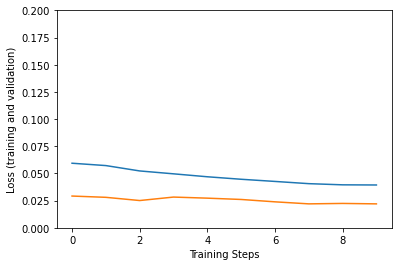

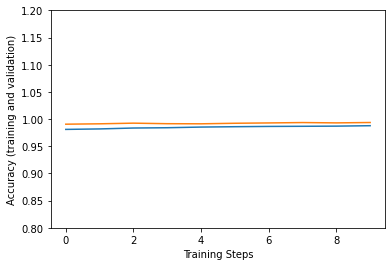

In [21]:
# plotting our loss and val loss
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,0.2])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0.8,1.2])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

In [26]:
# converting our keras model into coreml model

output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# converting our best model to coreml model
coreml_mnist = coremltools.converters.keras.convert(
    'best_model.09-0.03.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels, image_input_names='image')
print(coreml_mnist)


0 : conv2d_1_input, <keras.engine.input_layer.InputLayer object at 0x13b1932d0>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x1498b1890>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x149c17450>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x13b1937d0>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x1498646d0>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x149b0e6d0>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x13d2a07d0>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x14984b290>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0x149b0e9d0>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x14984ba10>
10 : flatten_1, <keras.layers.core.Flatten object at 0x1498aa450>
11 : dense_1, <keras.layers.core.Dense object at 0x149977690>
12 : dense_1__activation__, <keras.layers.core.Activation object at 0x149b6d6d0>
13 : dense_2, <

In [29]:
# Metadata for Xcode

coreml_mnist.author = 'umerzia.com'
coreml_mnist.license = 'umer_mnist'
coreml_mnist.short_description = 'Image based digit recognition (MNIST)'
coreml_mnist.input_description['image'] = 'Digit image'
coreml_mnist.output_description['output'] = 'Probability of each digit'
coreml_mnist.output_description['classLabel'] = 'Labels of digits'

# saving the model
coreml_mnist.save('MNISTClassifier.mlmodel')
